100%|██████████| 10/10 [00:00<00:00, 3623.28it/s]


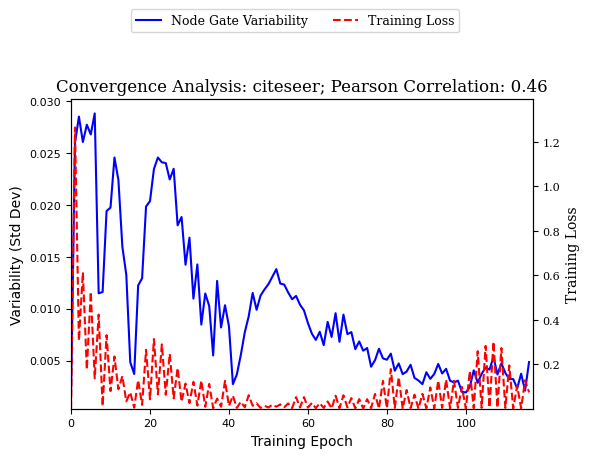

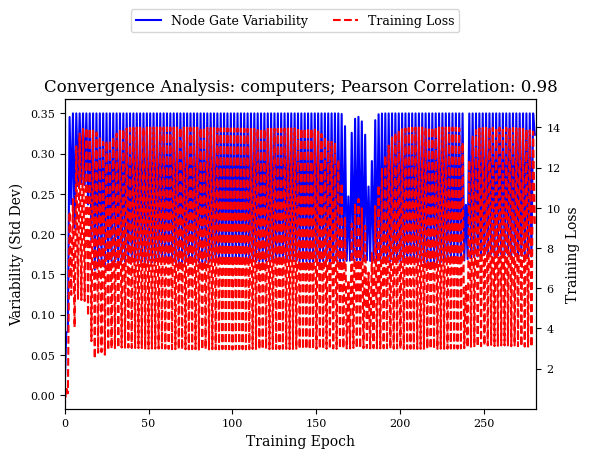

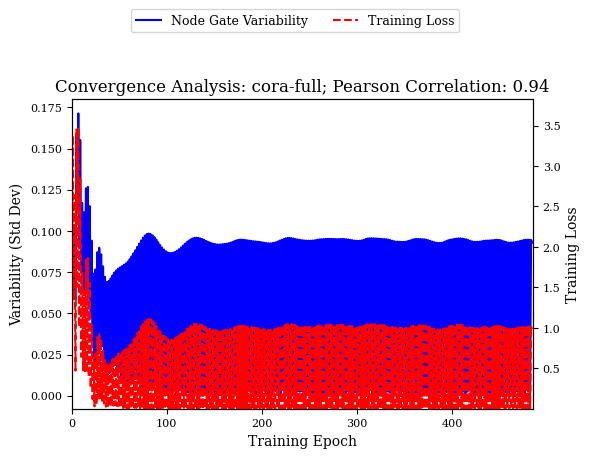

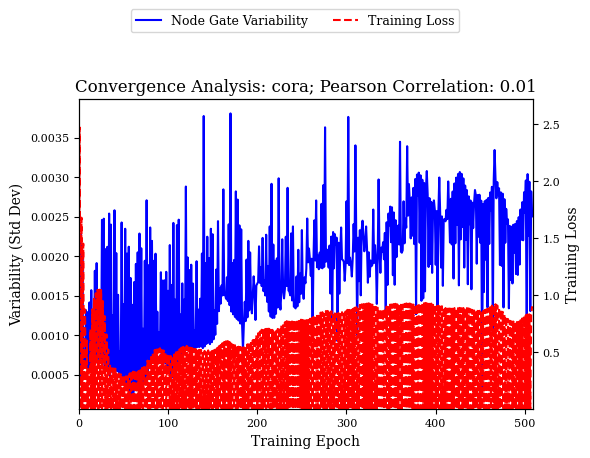

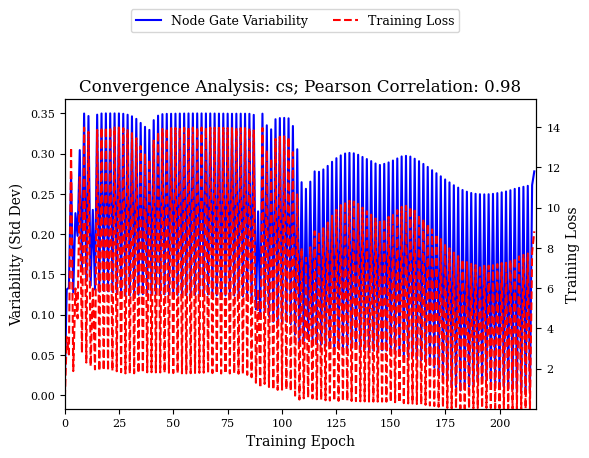

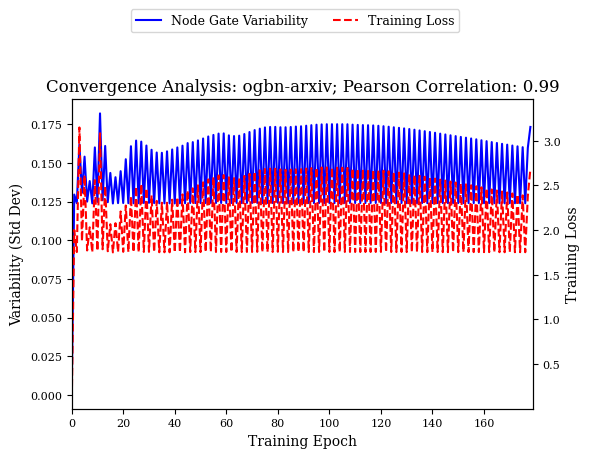

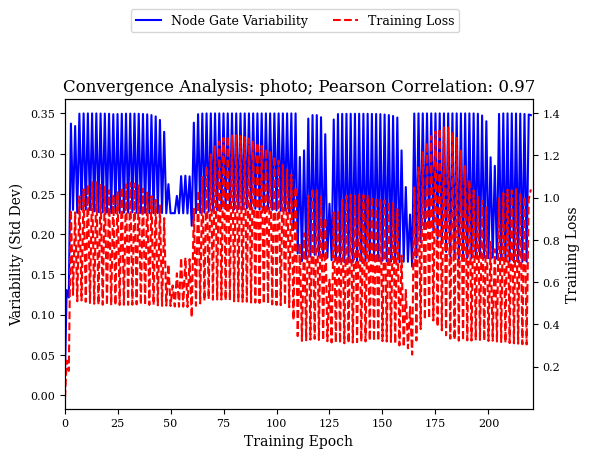

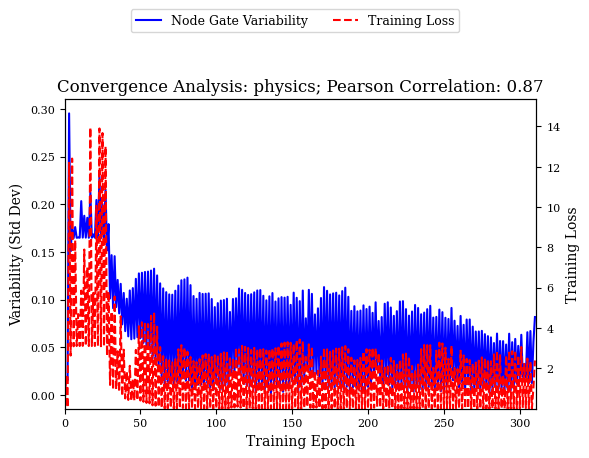

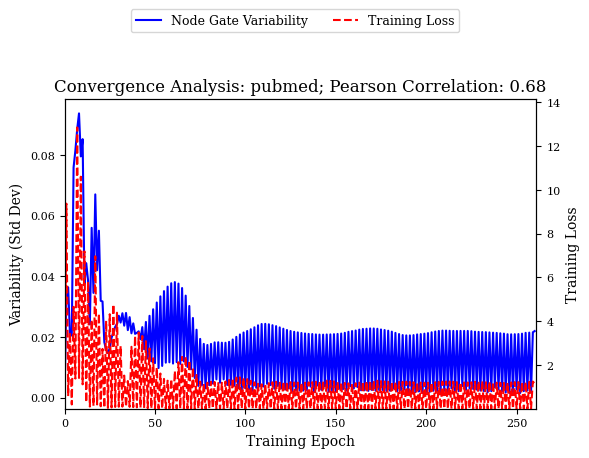

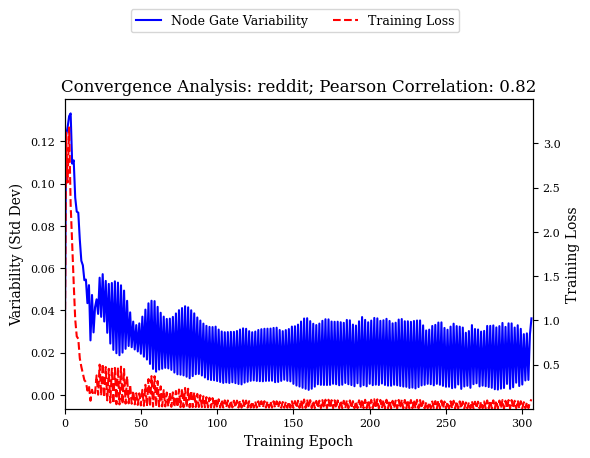

In [1]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

files_names = ["citeseer", "computers", "cora-full", "cora", "cs",
               "ogbn-arxiv", "photo", "physics", "pubmed", "reddit"]
calibration_methods = ["MoE"]
gating_all = {}
training_loss_all = {}
variability_all = {}

for file in tqdm(files_names, total=len(files_names)):
    for method in calibration_methods:
        gating_all[file] = np.load(f"figs/{method}_{file}_node_gates_training.npy")
        training_loss_all[file] = np.load(f"figs/{method}_{file}_training_loss.npy")
        variability_all[file] = np.std(gating_all[file], axis=1)
        
for file in files_names:
    gating_data = gating_all[file]
    training_loss = training_loss_all[file]
    variability = variability_all[file]

    runs = np.arange(len(gating_data))

    pearson_corr, _ = pearsonr(variability, training_loss)
    r_square = pearson_corr**2 

    fig, ax1 = plt.subplots(figsize=(6, 4))
    plt.rc('font', family='serif')

    ax1.plot(runs, variability, label='Node Gate Variability', color='blue', linewidth=1.5)
    ax1.set_xlabel('Training Epoch', fontsize=10)
    ax1.set_ylabel('Variability (Std Dev)', fontsize=10)
    ax1.set_xlim(0, len(gating_data))
    ax1.tick_params(axis='both', which='major', labelsize=8)

    ax2 = ax1.twinx()
    ax2.plot(runs, training_loss, label='Training Loss', color='red', linestyle='--', linewidth=1.5)
    ax2.set_ylabel('Training Loss', fontsize=10)
    ax2.set_ylim(min(training_loss) * 0.9, max(training_loss) * 1.1)
    ax2.tick_params(axis='y', which='major', labelsize=8)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=9, ncol=2)
    plt.title(f'Convergence Analysis: {file}; Pearson Correlation: {pearson_corr:.2f}', fontsize=12)

    ## plt.text(0.9, 0.9, f"Pearson Correlation: {pearson_corr:.2f}", transform=ax1.transAxes, fontsize=10, color='blue')
    # plt.text(0.05, 0.85, f"$R^2$: {r_square:.2f}", transform=ax1.transAxes, fontsize=10, color='green')

    plt.tight_layout()

    plt.savefig(f"figs/Convergence_Pattern_with_R2_{file}.png")
    plt.show()